# 🍷 **와인 품질 데이터 탐색하기** (Wine Quality EDA)

## 📁 1단계 데이터 준비
 분석할 데이터 CSV 파일 불러오기  
- 레드와인 데이터  
- 화이트와인 데이터  



## 🔗 2단계 데이터 병합
 레드와인 & 화이트와인 데이터 결합  
- 와인 유형 구분 변수 추가  
- 하나의 통합 데이터셋 생성  



## 📊 3단계 데이터 통계량 계산
 기술통계(Descriptive Statistics) 산출  
- 평균, 표준편차, 최소값, 최대값  
- 와인 품질 및 화학적 특성 분포 확인  



## 🧠 4단계 데이터 모델링
 통계 기반 분석 모델 생성  
- 레드와인 그룹 vs 화이트와인 그룹 비교  
- 기초 통계 분석  
- t-검정을 활용한 그룹 간 차이 검증  
- 품질 등급 예측을 위한 기초 분석 수행  



## 📈 5단계 결과 시각화
 와인 유형별 품질 등급 시각화  
- 레드 / 화이트 와인 품질 분포 플롯  
- 그룹 간 차이를 직관적으로 표현  


## 🎯 변수 설정

### 🔹 종속변수 (y)
- **quality (품질 점수)**  
  - 전문가들이 매긴 와인 품질 점수  
  - 보통 **5~7점** 구간에 분포  
  - **5점은 ‘보통 이하’로 평가된 와인**을 의미함  

---

### 🔹 독립변수 (X)
- **residual sugar (잔류당분)**
- **chlorides (염화물)**
- **free sulfur dioxide (유리 아황산)**
- **total sulfur dioxide (총 아황산)**
- **density (밀도)**
- **pH (산도 지수)**
- **sulphates (황산염)**
- **alcohol (알코올 도수)**

---

### 🔹 독립변수 상세 설명

- **`잔류당분` (residual sugar)**  
  발효 후 남아 있는 당분의 양을 의미함.  
  일반적으로 **2 이하이면 드라이 와인**으로 분류되며,  
  **1.9는 단맛이 거의 느껴지지 않는 수준**임.

- **`염화물` (chlorides)**  
  와인의 짠맛과 관련된 성분으로,  
  수치가 너무 높으면 풍미를 해칠 수 있음.  
  **0.076은 평균적인 수준**으로 평가됨.

- **`유리 아황산` (free sulfur dioxide)**  
  산화 방지 및 미생물 억제 역할을 수행함.  
  일반적으로 **10~30 사이가 적절**하며,  
  **11은 비교적 낮은 편에 속함**.

- **`총 아황산` (total sulfur dioxide)**  
  와인 전체에 포함된 아황산의 총량을 의미함.  
  보통 **150 이하가 일반적**이며,  
  **34는 매우 낮고 안전한 수준**임.

- **`밀도` (density)**  
  물의 밀도는 1.0이며,  
  당분이 많거나 알코올 함량이 낮을수록 밀도가 높아짐.  
  **0.9978은 일반적인 드라이 레드 와인의 수치**임.

- **`산도 지수` (pH)**  
  산도의 반대 개념으로, 수치가 낮을수록 산성이 강함.  
  와인은 일반적으로 **pH 3~4 범위**에 있으며,  
  **3.51은 비교적 부드러운 산도**를 의미함.

- **`황산염` (sulphates)**  
  와인의 향과 보존성을 높이는 역할을 함.  
  과도할 경우 쓴맛을 유발할 수 있으나,  
  **0.56은 적절한 수준**으로 평가됨.

- **`알코올 도수` (alcohol)**  
  와인의 알코올 함량을 의미함.  
  레드 와인의 평균 도수는 **10~13도**이며,  
  **0.4는 매우 낮은 수치로 일반적인 와인 범위에서는 이례적**임.


---

## ⚠️ 데이터 누수(Data Leakage) 관련 설명

- 본 분석은 **예측 모델의 성능 평가를 목적으로 하지 않는 탐색적 데이터 분석(EDA)** 및 **기초 통계 분석과 집단 간 차이 검정(t-검정)** 을 수행하는 단계이다.

따라서 본 과정에서는  
- 훈련 데이터(train)와 테스트 데이터(test)를 분리하지 않았으며  
- 전체 데이터를 활용하여 기술통계 산출 및 와인 유형(레드/화이트) 간 특성 비교를 수행하였다.

이는 **미래 데이터 예측이나 모델 성능 비교를 수행하지 않는 분석 단계**이므로, 일반적인 머신러닝 분석에서 문제가 되는 **데이터 누수(Data Leakage)** 에 해당하지 않는다.

본 분석의 목적은  
와인 유형에 따른 품질 분포와 화학적 특성의 차이를 탐색하고,  
통계적으로 유의미한 변수들을 확인하는 데 있다.

향후 회귀 분석 등 예측 모델을 구축하는 단계에서는  
훈련/검증 데이터 분리 및 파이프라인을 적용하여  
데이터 누수가 발생하지 않도록 분석을 확장할 예정이다.


---
---

### **1단계 : 데이터 준비하기**

In [29]:
## pandas and numpy 라이브러리 불러오기
import pandas as pd 
import numpy as np

## csv 파일을 DataFrame으로 불러오기
red_df = pd.read_csv('winequality-red.csv')
white_df = pd.read_csv('winequality-white.csv')    

display(red_df)
display(white_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


---
---

### **2단계 : 데이터 병합하기**

##### 1) 레드 와인과 화이트 와인 파일 합치기

- 레드 와인에 type열 추가하기

In [30]:
red_df.insert(0, column = 'type', value = 'red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
red_df.shape

(1599, 13)

- 화이트 와인에도 type 열 추가하기

In [32]:
white_df.insert(0, column = 'type', value = 'white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
white_df.shape

(4898, 13)

##### 2) red_df 와 white_df 를 병합한 후 구조 확인하기 


In [34]:
wine_pd = pd.concat([red_df, white_df]) ### concat 을 이용하여 red_df 와 white_df 를 합치기
wine_pd.shape


(6497, 13)

In [35]:
wine_pd.to_csv('wine.csv', index = False) ### 합쳐진 DataFrame을 csv 파일로 저장하기

In [36]:
wine_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


---
---

### **3단계 : 데이터 통계 계산**

1) 공백을 언더바('_')로 대체한다.

In [37]:
wine_pd.columns = wine_pd.columns.str.replace(' ', '_')
wine_pd.head() 

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2) 기술통계 수치 확인하기 describe()

In [38]:
wine_pd.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [39]:
np.sort(wine_pd.quality.unique())

array([3, 4, 5, 6, 7, 8, 9])

---
---

### 4단계 : 데이터 모델링

1) 그룹비교

In [40]:
wine_pd.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


2) t-검정

In [41]:
## ttest_ind 불러오기
from scipy.stats import ttest_ind

## 유의수준(alpha) 설정
alpha = 0.05

## 와인 품질변수 생성
red_quality = wine_pd.loc[wine_pd['type'] == 'red', 'quality'].dropna()
white_quality = wine_pd.loc[wine_pd['type'] == 'white', 'quality'].dropna()

## 독립표본 t-검정 수행, equal_var = False 설정 두 그룹의 분산이 다르다고 가정 이유: white wine의 품질변수의 분산이 red wine의 품질변수의 분산보다 크기 때문
t_value, p_value = ttest_ind(red_quality, white_quality, equal_var = False)

print("[t-검정 결과]")
print(f"Red wine 샘플 수 : {len(red_quality)}")
print(f" White wine 샘플 수 : {len(white_quality)}")
print(f"t-value (검정통계량) : {t_value:.4f}")
print(f"p-value (유의확률) : {p_value:.4f}") 
print(f"유의수준 (alpha) : {alpha}")

[t-검정 결과]
Red wine 샘플 수 : 1599
 White wine 샘플 수 : 4898
t-value (검정통계량) : -10.1494
p-value (유의확률) : 0.0000
유의수준 (alpha) : 0.05


t-검정 결과, p-value가 유의수준(α = 0.05)보다 작으므로 귀무가설을 기각한다.  
따라서 레드와인과 화이트와인의 평균 품질 점수는 통계적으로 유의미한 차이가 있는 것으로 나타났다.  

또한 검정통계량(t-value)이 음수로 나타나,  
화이트와인의 평균 품질 점수가 레드와인보다 높은 경향을 보였다.

---
---

### 5단계 : 결과 시각화

t-검정 결과를 히스토그램(막대그래프) 로 시각화

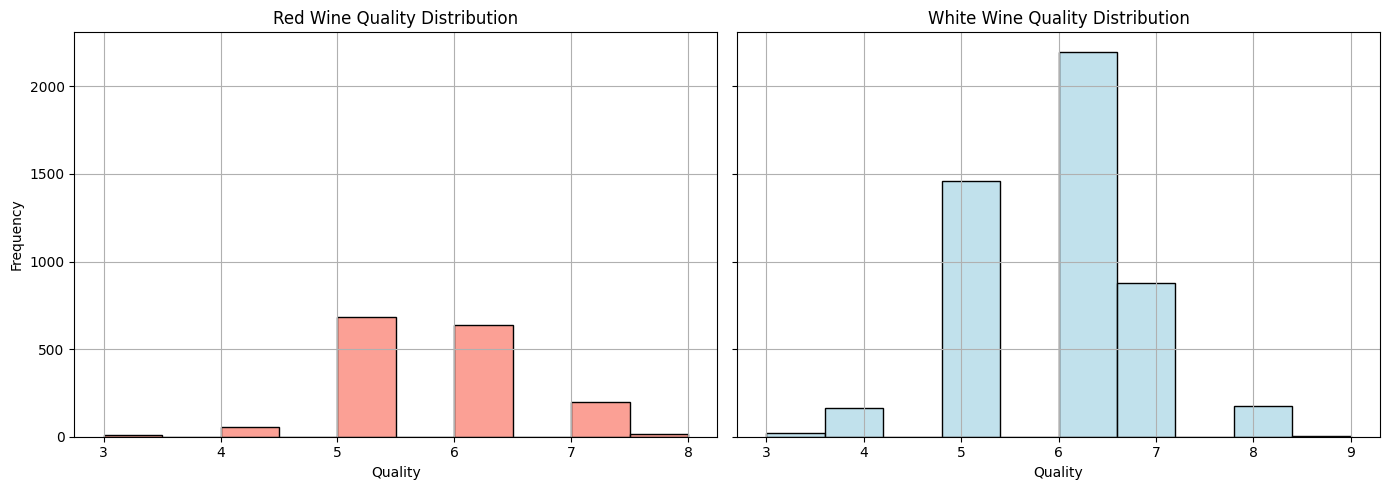

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axes = plt.subplots(1, 2, figsize = (14, 5), sharey = True)

sns.histplot(wine_pd.loc[wine_pd['type'] == 'red', 'quality'], bins = 10, kde = False , color = 'salmon', ax = axes[0])

axes[0].set_title('Red Wine Quality Distribution')
axes[0].set_xlabel('Quality')   
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

sns.histplot(wine_pd.loc[wine_pd['type'] == 'white', 'quality'], bins = 10, kde = False , color = 'lightblue', ax = axes[1])
axes[1].set_title('White Wine Quality Distribution')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('')
axes[1].grid(True)

plt.tight_layout()
plt.show()

---
---

---

## ✅ 최종 결론 (Conclusion)

본 분석에서는 레드와인과 화이트와인 데이터를 병합하여 품질(quality) 분포를 탐색하고,  
와인 유형(type)에 따라 평균 품질 점수에 차이가 존재하는지 독립표본 t-검정으로 확인했다.

- 표본 수: Red = 1,599 / White = 4,898  
- 평균 품질 점수: Red = **5.636**, White = **5.878** (화이트가 약 **0.242점** 높음)  
- t-검정 결과: t = **-10.1494**, p-value < **0.05**

따라서 p-value가 유의수준(α = 0.05)보다 작으므로 **귀무가설(H₀: 두 집단의 평균 품질은 같다)을 기각**한다.  
즉, **레드와인과 화이트와인의 평균 품질 점수는 통계적으로 유의미하게 다르며**,  
검정통계량이 음수이므로 **화이트와인의 평균 품질이 레드와인보다 높은 경향**을 보였다.

### 📌 해석 시 유의점
본 결과는 “두 유형 간 평균 차이”를 보여주는 것이며,  
특정 화학적 특성(잔류당분, 염화물, 아황산, 밀도, pH, 황산염, 알코올 등)이 차이를 **직접적으로 원인**이라고 단정하지는 않는다.

### 🔜 다음 분석(확장) 방향
향후에는 독립변수(X)들을 활용하여 품질(quality)을 예측하는 회귀 모델을 구축하고,  
훈련/테스트 데이터 분리 및 파이프라인을 적용해 성능(R², RMSE 등)을 평가함으로써  
“차이가 얼마나 예측 가능한지”까지 확장 분석할 수 있다.

---
